In [2]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
filename = 'nifty50_2.csv'
df = pd.read_csv(filename)
df.columns = ["Date","Open","High","Low","Close","Volume"]
try:
    df["Date"] = [datetime.strptime(i,"%m/%d/%Y").date() for i in df["Date"]]
except:
    df["Date"] = [datetime.strptime(i,"%d-%b-%y").date() for i in df["Date"]]
df["weekDay"] = [j.weekday() for j in df["Date"]]
df = df[~np.logical_or(df["weekDay"]==5,df["weekDay"]==6)]
df["Pct_change"] = 100*(df["Close"] - df["Open"])/df["Open"]
df["abs_Pct_change"] = np.abs(df["Pct_change"])
df_upside = df[df["Pct_change"]>=0]
df_downside = df[df["Pct_change"]<=0]

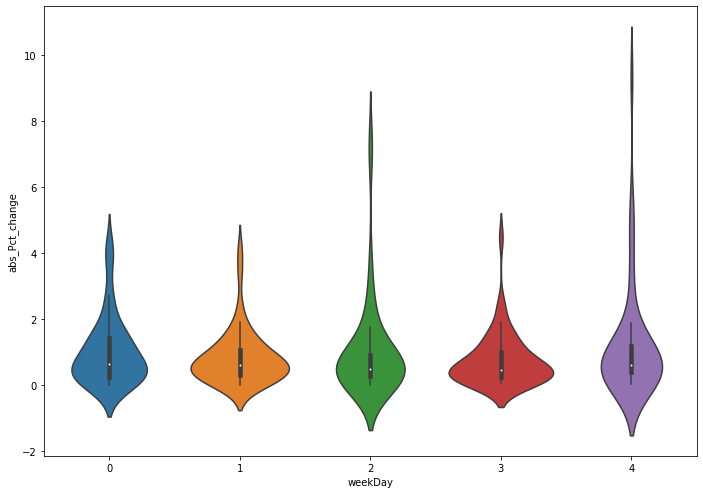

In [3]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

daily_plot_overall = sns.violinplot(x=df.weekDay, y=df.abs_Pct_change, ax=ax)


In [4]:
df_mon_overall = df[df["weekDay"]==0]["abs_Pct_change"].describe()
df_mon_overall["90%"] = np.percentile(df[df["weekDay"]==0]["abs_Pct_change"],90)

df_tue_overall = df[df["weekDay"]==1]["abs_Pct_change"].describe()
df_tue_overall["90%"] = np.percentile(df[df["weekDay"]==1]["abs_Pct_change"],90)

df_wed_overall = df[df["weekDay"]==2]["abs_Pct_change"].describe()
df_wed_overall["90%"] = np.percentile(df[df["weekDay"]==2]["abs_Pct_change"],90)

df_thu_overall = df[df["weekDay"]==3]["abs_Pct_change"].describe()
df_thu_overall["90%"] = np.percentile(df[df["weekDay"]==3]["abs_Pct_change"],90)

df_fri_overall = df[df["weekDay"]==4]["abs_Pct_change"].describe()
df_fri_overall["90%"] = np.percentile(df[df["weekDay"]==4]["abs_Pct_change"],90)

df_result_overall = pd.concat([df_mon_overall,df_tue_overall,df_wed_overall,df_thu_overall,df_fri_overall], axis = 1)
df_result_overall.columns = ["Monday", "Tuesday", "Wednesday","Thursday", "Friday"]

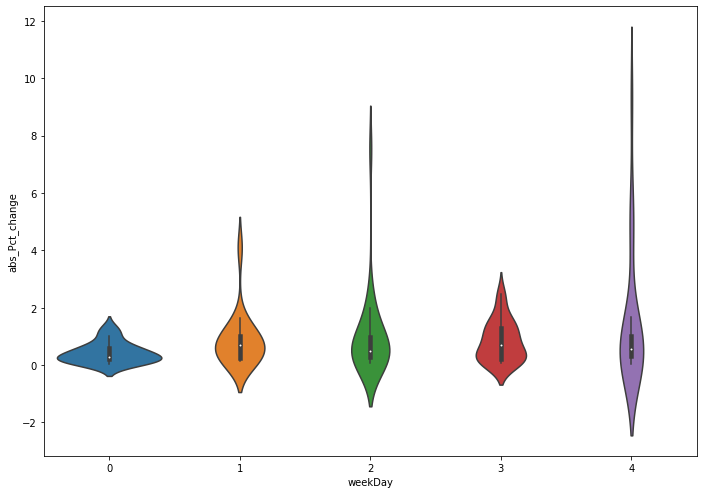

In [5]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

daily_plot_upside = sns.violinplot(x=df_upside.weekDay, y=df_upside.abs_Pct_change, ax=ax)


In [6]:
df_mon_upside = df_upside[df_upside["weekDay"]==0]["abs_Pct_change"].describe()
df_mon_upside["90%"] = np.percentile(df_upside[df_upside["weekDay"]==0]["abs_Pct_change"],90)

df_tue_upside = df_upside[df_upside["weekDay"]==1]["abs_Pct_change"].describe()
df_tue_upside["90%"] = np.percentile(df_upside[df_upside["weekDay"]==1]["abs_Pct_change"],90)

df_wed_upside = df_upside[df_upside["weekDay"]==2]["abs_Pct_change"].describe()
df_wed_upside["90%"] = np.percentile(df_upside[df_upside["weekDay"]==2]["abs_Pct_change"],90)

df_thu_upside = df_upside[df_upside["weekDay"]==3]["abs_Pct_change"].describe()
df_thu_upside["90%"] = np.percentile(df_upside[df_upside["weekDay"]==3]["abs_Pct_change"],90)

df_fri_upside = df_upside[df_upside["weekDay"]==4]["abs_Pct_change"].describe()
df_fri_upside["90%"] = np.percentile(df_upside[df_upside["weekDay"]==4]["abs_Pct_change"],90)

df_result_upside = pd.concat([df_mon_upside,df_tue_upside,df_wed_upside,df_thu_upside,df_fri_upside], axis = 1)
df_result_upside.columns = ["Monday", "Tuesday", "Wednesday","Thursday", "Friday"]

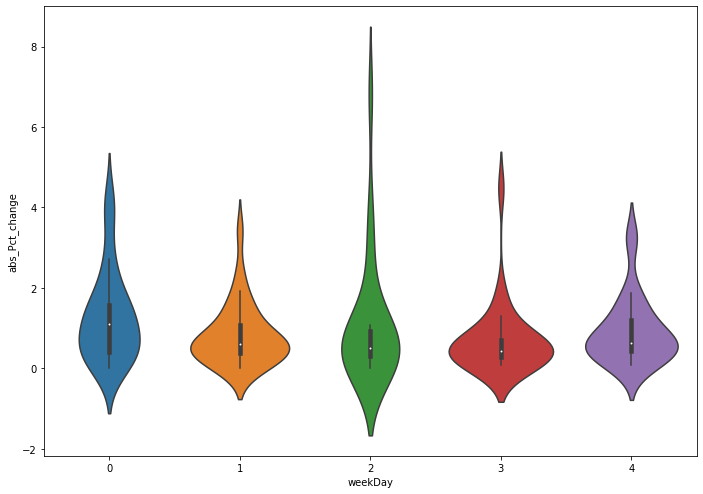

In [7]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

daily_plot_downside = sns.violinplot(x=df_downside.weekDay, y=df_downside.abs_Pct_change, ax=ax)


In [8]:
df_mon_downside = df_downside[df_downside["weekDay"]==0]["abs_Pct_change"].describe()
df_mon_downside["90%"] = np.percentile(df_downside[df_downside["weekDay"]==0]["abs_Pct_change"],90)

df_tue_downside = df_downside[df_downside["weekDay"]==1]["abs_Pct_change"].describe()
df_tue_downside["90%"] = np.percentile(df_downside[df_downside["weekDay"]==1]["abs_Pct_change"],90)

df_wed_downside = df_downside[df_downside["weekDay"]==2]["abs_Pct_change"].describe()
df_wed_downside["90%"] = np.percentile(df_downside[df_downside["weekDay"]==2]["abs_Pct_change"],90)

df_thu_downside = df_downside[df_downside["weekDay"]==3]["abs_Pct_change"].describe()
df_thu_downside["90%"] = np.percentile(df_downside[df_downside["weekDay"]==3]["abs_Pct_change"],90)

df_fri_downside = df_downside[df_downside["weekDay"]==4]["abs_Pct_change"].describe()
df_fri_downside["90%"] = np.percentile(df_downside[df_downside["weekDay"]==4]["abs_Pct_change"],90)


df_result_downside = pd.concat([df_mon_downside,df_tue_downside,df_wed_downside,df_thu_downside,df_fri_downside], axis = 1)
df_result_downside.columns = ["Monday", "Tuesday", "Wednesday","Thursday", "Friday"]

In [9]:
df_compiled_analysis = pd.concat([df_result_overall,df_result_upside,df_result_downside], axis = 1, keys = ["Overall", "Upside", "Downside"])
df_compiled_analysis.to_excel(filename.split('-')[0] +'DailyAnalysis.xlsx')